In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

# file structure --> {groundtruth, prediction, Prediction Intensity}
#file index --> {groundtruth:1, prediction:2, Prediction Intensity:3}
file1 = open('/content/vit/compressed/vit_compressed_dark_female.csv')
file2 = open('/content/vit/compressed/vit_compressed_light_female.csv')


# Read csv files
file1_csv_reader = csv.reader(file1)
file1_header = next(file1_csv_reader)

file2_csv_reader = csv.reader(file2)
file2_header = next(file2_csv_reader)

data_points_1 = []
data_points_2 = []

for i in file1_csv_reader:
        data_points_1.append(i)
data_points_1 = np.array(data_points_1)

for j in file2_csv_reader:
        data_points_2.append(j)
data_points_2 = np.array(data_points_2)


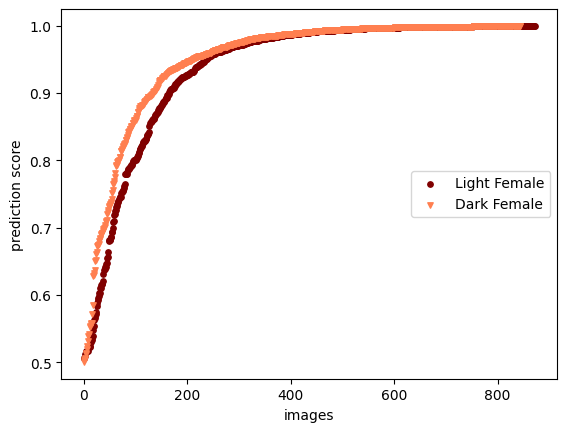

In [4]:
###################################  Intensity plots  ###################################

dp1=data_points_1
dp2=data_points_2

correct_prediction_indices_dp1 = np.where(dp1[:,0] == dp1[:,1])
correct_prediction_intensities_dp1 = np.float_(dp1[correct_prediction_indices_dp1][:,2])

correct_prediction_indices_dp2 = np.where(dp2[:,0] == dp2[:,1])
correct_prediction_intensities_dp2 = np.float_(dp2[correct_prediction_indices_dp2][:,2])

fig, ax = plt.subplots()
ax.scatter(range(len(correct_prediction_intensities_dp1)),np.sort(correct_prediction_intensities_dp1), label='Light Female', marker = "o", s=15, color='maroon')
ax.scatter(range(len(correct_prediction_intensities_dp2)),np.sort(correct_prediction_intensities_dp2), label='Dark Female', marker = "v", s=15, color='coral')
legend = ax.legend(loc='center right') #, fontsize='large'
plt.xlabel('images')
plt.ylabel('prediction score')
plt.savefig('/content/vit/compressed/vit_compressed_light_female_vs_dark_female.png')
plt.show()

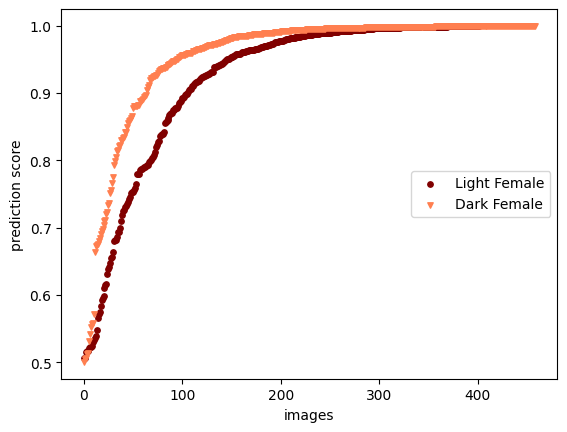

In [5]:
correct_prediction_indices_dp1_gan = np.where((dp1[:,0] == dp1[:,1]) & (dp1[:,0] == np.str_(0)))  # label 0 --> gan
correct_prediction_intensities_dp1_gan = np.float_(dp1[correct_prediction_indices_dp1_gan][:,2])
correct_prediction_indices_dp2_gan = np.where((dp2[:,0] == dp2[:,1]) & (dp2[:,0] == np.str_(0)))  # label 0 --> gan
correct_prediction_intensities_dp2_gan = np.float_(dp2[correct_prediction_indices_dp2_gan][:,2])

fig, ax = plt.subplots()
ax.scatter(range(len(correct_prediction_intensities_dp1_gan)),np.sort(correct_prediction_intensities_dp1_gan), label='Light Female', marker = "o", s=15, color='maroon')
ax.scatter(range(len(correct_prediction_intensities_dp2_gan)),np.sort(correct_prediction_intensities_dp2_gan), label='Dark Female', marker = "v", s=15, color='coral')
legend = ax.legend(loc='center right') #, fontsize='large'
plt.xlabel('images')
plt.ylabel('prediction score')
plt.savefig('/content/vit/compressed/vit_compressed_light_female_vs_dark_female_gan.png')
plt.show()

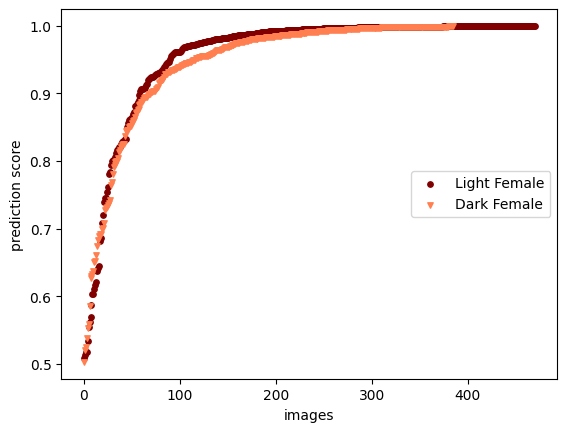

In [6]:
correct_prediction_indices_dp1_real = np.where((dp1[:,0] == dp1[:,1]) & (dp1[:,0] == np.str_(1)))  # label 1 --> real
correct_prediction_intensities_dp1_real = np.float_(dp1[correct_prediction_indices_dp1_real][:,2])
correct_prediction_indices_dp2_real = np.where((dp2[:,0] == dp2[:,1]) & (dp2[:,0] == np.str_(1)))  # label 1 --> real
correct_prediction_intensities_dp2_real = np.float_(dp2[correct_prediction_indices_dp2_real][:,2])

fig, ax = plt.subplots()
ax.scatter(range(len(correct_prediction_intensities_dp1_real)),np.sort(correct_prediction_intensities_dp1_real), label='Light Female', marker = "o", s=15, color='maroon')
ax.scatter(range(len(correct_prediction_intensities_dp2_real)),np.sort(correct_prediction_intensities_dp2_real), label='Dark Female', marker = "v", s=15, color='coral')
legend = ax.legend(loc='center right') #, fontsize='large'
plt.xlabel('images')
plt.ylabel('prediction score')
plt.savefig('/content/vit/compressed/vit_compressed_light_female_vs_dark_female_real.png')
plt.show()

In [7]:
###################################  Average Prediction intensities  ###################################

average_prediction_intensities_dp1 = np.average(np.float_(correct_prediction_intensities_dp1))
print("Average Prediction intensities of dp1 = ", average_prediction_intensities_dp1)
average_prediction_intensities_dp2 = np.average(np.float_(correct_prediction_intensities_dp2))
print("Average Prediction intensities of dp2 = ", average_prediction_intensities_dp2)
print("\n")

average_prediction_intensities_dp1_gan = np.average(np.float_(correct_prediction_intensities_dp1_gan))
print("Average Prediction intensities of dp1 GAN = ",average_prediction_intensities_dp1_gan)
average_prediction_intensities_dp2_gan = np.average(np.float_(correct_prediction_intensities_dp2_gan))
print("Average Prediction intensities of dp2 GAN = ",average_prediction_intensities_dp2_gan)
print("\n")

average_prediction_intensities_dp1_real = np.average(np.float_(correct_prediction_intensities_dp1_real))
print("Average Prediction intensities of dp1 Real = ",average_prediction_intensities_dp1_real)
average_prediction_intensities_dp2_real = np.average(np.float_(correct_prediction_intensities_dp2_real))
print("Average Prediction intensities of dp2 Real = ",average_prediction_intensities_dp2_real)
print("\n")

acs_gan = 1 - (average_prediction_intensities_dp1_gan/average_prediction_intensities_dp2_gan)
print("ACS GAN = ", acs_gan)

acs_real = 1 - (average_prediction_intensities_dp1_real/average_prediction_intensities_dp2_real)
print("ACS Real = ", acs_real)

Average Prediction intensities of dp1 =  0.9380078228255162
Average Prediction intensities of dp2 =  0.9483485192060258


Average Prediction intensities of dp1 GAN =  0.9154446634093728
Average Prediction intensities of dp2 GAN =  0.9546465341269291


Average Prediction intensities of dp1 Real =  0.9572655512443904
Average Prediction intensities of dp2 Real =  0.9408594289244331


ACS GAN =  0.04106427805073254
ACS Real =  -0.0174373788640374


In [8]:
###################################  Accuracy  ###################################

accuracy_dp1 = (len(correct_prediction_indices_dp1[0])/len(dp1))*100
print("Accuracy dp1 = ",accuracy_dp1)
accuracy_dp2 = (len(correct_prediction_indices_dp2[0])/len(dp2))*100
print("Accuracy dp2 = ",accuracy_dp2)
accuracy_diff_dp1_dp2 = abs(accuracy_dp1 - accuracy_dp2)
print("Accuracy difference of dp1 & dp2 = ",accuracy_diff_dp1_dp2)

print("\n")
error_dp1 = 1- (len(correct_prediction_indices_dp1[0])/len(dp1))
print("Error dp1 = ",error_dp1)
error_dp2 = 1- (len(correct_prediction_indices_dp2[0])/len(dp2))
print("Error dp2 = ",error_dp2)
error_diff_dp1_dp2 = abs(error_dp1 - error_dp2)
print("Error difference of dp1 & dp2 = ",error_diff_dp1_dp2)

Accuracy dp1 =  87.3
Accuracy dp2 =  84.5
Accuracy difference of dp1 & dp2 =  2.799999999999997


Error dp1 =  0.127
Error dp2 =  0.15500000000000003
Error difference of dp1 & dp2 =  0.028000000000000025


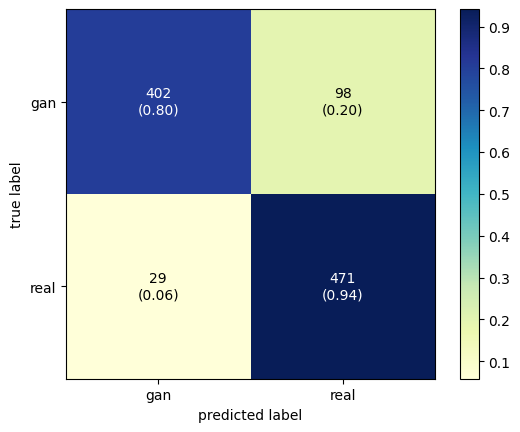

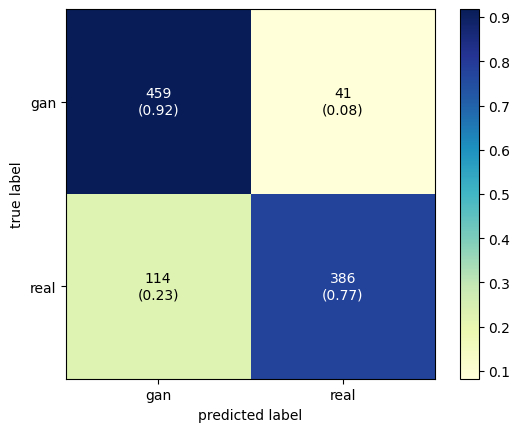

In [9]:
###################################  Confusion Matrix  ###################################

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

class_names=['gan', 'real']


cm1 = confusion_matrix(y_target=dp1[:,0],
                      y_predicted=dp1[:,1],
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm1,
                                show_normed=True,
                                cmap="YlGnBu",
                                colorbar=True)#,
                                #class_names=class_names)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names,rotation=0)
plt.yticks(tick_marks, class_names)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('/content/vit/compressed/vit_compressed_light_female.png')
plt.show()

cm2 = confusion_matrix(y_target=dp2[:,0],
                      y_predicted=dp2[:,1],
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm2,
                                show_normed=True,
                                cmap="YlGnBu",
                                colorbar=True)#,
                                #class_names=class_names)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names,rotation=0)
plt.yticks(tick_marks, class_names)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('/content/vit/compressed/vit_compressed_light_female.png')
plt.show()



In [10]:
###################################  Balanced Accuracy  ###################################

sensitivity1 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print('Sensitivity or TPR dp1 : ', sensitivity1 )
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity or TPR dp2 : ', sensitivity2 )
print("\n")

specificity1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print('Specificity or TNR dp1 : ', specificity1)
specificity2 = cm2[1,1] / (cm2[1,0] + cm2[1,1])
print('Specificity or TNR dp2 : ', specificity2)
print("\n")

fpr1 = cm1[1,0] / (cm1[1,0] + cm1[1,1])
print('FPR dp1 : ', fpr1)
fpr2 = cm2[1,0] / (cm2[1,0] + cm2[1,1])
print('FPR dp2 : ', fpr2)
print("\n")

fnr1 = cm1[0,1] / (cm1[0,0] + cm1[0,1])
print('FNR dp1 : ', fnr1)
fnr2 = cm2[0,1] / (cm2[0,0] + cm2[0,1])
print('FNR dp2 : ', fnr2)
print("\n")

balanced_accuracy1 = ((sensitivity1 + specificity1) / 2) * 100
print('Balanced Accuracy dp1 : ', balanced_accuracy1 )
balanced_accuracy2 = ((sensitivity2 + specificity2) / 2) * 100
print('Balanced Accuracy dp2 : ', balanced_accuracy2 )
balanced_accuracy_diff_dp1_dp2 = abs(balanced_accuracy1 - balanced_accuracy2)
print("Balanced Accuracy difference of dp1 & dp2 = ",balanced_accuracy_diff_dp1_dp2)
print("\n")

ppv1 = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print('Positive Predictive Value dp1 : ', ppv1)
ppv2 = cm2[0,0] / (cm2[0,0] + cm2[1,0])
print('Positive Predictive Value dp2 : ', ppv2)
print("\n")

p1 = cm1[0,0] + cm1[0,1]
n1 = cm1[1,1] + cm1[1,0]
prevalance1 = p1 / (p1 + n1)
print('Prevalance dp1 : ', prevalance1)
p2 = cm2[0,0] + cm2[0,1]
n2 = cm2[1,1] + cm2[1,0]
prevalance2 = p2 / (p2 + n2)
print('Prevalance dp2 : ', prevalance2)
print("\n")

ppp1 = (cm1[0,0] + cm1[1,0]) / n1
print('PPP dp1 : ', ppp1)
ppp2 = (cm2[0,0] + cm2[1,0]) / n2
print('PPP dp2 : ', ppp2)

Sensitivity or TPR dp1 :  0.804
Sensitivity or TPR dp2 :  0.918


Specificity or TNR dp1 :  0.942
Specificity or TNR dp2 :  0.772


FPR dp1 :  0.058
FPR dp2 :  0.228


FNR dp1 :  0.196
FNR dp2 :  0.082


Balanced Accuracy dp1 :  87.3
Balanced Accuracy dp2 :  84.5
Balanced Accuracy difference of dp1 & dp2 =  2.799999999999997


Positive Predictive Value dp1 :  0.9327146171693735
Positive Predictive Value dp2 :  0.8010471204188482


Prevalance dp1 :  0.5
Prevalance dp2 :  0.5


PPP dp1 :  0.862
PPP dp2 :  1.146


In [11]:
#################################### Demographic parity  ###################################

## Demographic parity of GAN

dp1_gan_prediction_indices = np.array(np.where(dp1[:,1]== np.str_(0)))  # label 0 --> gan
dp1_gan_prediction_count = dp1_gan_prediction_indices.shape[1]
prob_gan_dp1 = dp1_gan_prediction_count/dp1.shape[0]
print("Demographic Parity dp1 GAN : ", prob_gan_dp1)

dp2_gan_prediction_indices = np.array(np.where(dp2[:,1]== np.str_(0)))  # label 0 --> gan
dp2_gan_prediction_count = dp2_gan_prediction_indices.shape[1]
prob_gan_dp2 = dp2_gan_prediction_count/dp2.shape[0]
print("Demographic Parity dp2 GAN : ", prob_gan_dp2)

if prob_gan_dp1 > prob_gan_dp2:
  dp_gan = prob_gan_dp2/prob_gan_dp1
else:
  dp_gan = prob_gan_dp1/prob_gan_dp2
print("\n")
print("Demographic Parity ratio GAN : ", dp_gan)
print("\n")
print("\n")

## Demographic parity of Real

dp1_real_prediction_indices = np.array(np.where(dp1[:,1]== np.str_(1)))  # label 1 --> real
dp1_real_prediction_count = dp1_real_prediction_indices.shape[1]
prob_real_dp1 = dp1_real_prediction_count/dp1.shape[0]
print("Demographic Parity dp1 Real : ", prob_real_dp1)

dp2_real_prediction_indices = np.array(np.where(dp2[:,1]== np.str_(1)))  # label 1 --> real
dp2_real_prediction_count = dp2_real_prediction_indices.shape[1]
prob_real_dp2 = dp2_real_prediction_count/dp2.shape[0]
print("Demographic Parity dp2 Real : ", prob_real_dp2)

if prob_real_dp1 > prob_real_dp2:
  dp_real = prob_real_dp2/prob_real_dp1
else:
  dp_real = prob_real_dp1/prob_real_dp2
print("\n")
print("Demographic Parity ratio Real : ", dp_real)


Demographic Parity dp1 GAN :  0.431
Demographic Parity dp2 GAN :  0.573


Demographic Parity ratio GAN :  0.7521815008726004




Demographic Parity dp1 Real :  0.569
Demographic Parity dp2 Real :  0.427


Demographic Parity ratio Real :  0.7504393673110721


In [12]:
####################################  Equal Opportunity ###################################

## Equal Opportunity of GAN

correct_prediction_indices_dp1_gan_count = np.shape(correct_prediction_indices_dp1_gan)[1]
groundtruth_indices_dp1_gan_count = np.array(np.where(dp1[:,0]== np.str_(0))).shape[1]  # label 0 --> gan
eo_dp1_gan = correct_prediction_indices_dp1_gan_count / groundtruth_indices_dp1_gan_count
print("Equal Opportunity dp1 GAN = ", eo_dp1_gan)

correct_prediction_indices_dp2_gan_count = np.shape(correct_prediction_indices_dp2_gan)[1]
groundtruth_indices_dp2_gan_count = np.array(np.where(dp2[:,0]== np.str_(0))).shape[1]  # label 0 --> gan
eo_dp2_gan = correct_prediction_indices_dp2_gan_count / groundtruth_indices_dp2_gan_count
print("Equal Opportunity dp2 GAN = ", eo_dp2_gan)

if eo_dp1_gan > eo_dp2_gan:
  eo_gan = eo_dp2_gan/eo_dp1_gan
else:
  eo_gan = eo_dp1_gan/eo_dp2_gan
print("\n")
print("Equal Opportunity ratio GAN : ", eo_gan)
print("\n")
print("\n")

## Equal Opportunity of Real

correct_prediction_indices_dp1_real_count = np.shape(correct_prediction_indices_dp1_real)[1]
groundtruth_indices_dp1_real_count = np.array(np.where(dp1[:,0]== np.str_(1))).shape[1]  # label 1 --> real
eo_dp1_real = correct_prediction_indices_dp1_real_count / groundtruth_indices_dp1_real_count
print("Equal Opportunity dp1 Real = ", eo_dp1_real)

correct_prediction_indices_dp2_real_count = np.shape(correct_prediction_indices_dp2_real)[1]
groundtruth_indices_dp2_real_count = np.array(np.where(dp2[:,0]== np.str_(1))).shape[1]  # label 1 --> real
eo_dp2_real = correct_prediction_indices_dp2_real_count / groundtruth_indices_dp2_real_count
print("Equal Opportunity dp2 Real = ", eo_dp2_real)

if eo_dp1_real > eo_dp2_real:
  eo_real = eo_dp2_real/eo_dp1_real
else:
  eo_real = eo_dp1_real/eo_dp2_real
print("\n")
print("Equal Opportunity ratio Real : ", eo_real)

Equal Opportunity dp1 GAN =  0.804
Equal Opportunity dp2 GAN =  0.918


Equal Opportunity ratio GAN :  0.8758169934640523




Equal Opportunity dp1 Real =  0.942
Equal Opportunity dp2 Real =  0.772


Equal Opportunity ratio Real :  0.8195329087048833


In [13]:
####################################  AUC  ####################################

y_dp1 = np.float_(dp1[:,0].tolist())
ypred_dp1 = np.float_(dp1[:,1].tolist())
auc_dp1 = metrics.roc_auc_score(y_dp1, ypred_dp1)
print("AUC dp1 = ", auc_dp1)

y_dp2 = np.float_(dp2[:,0].tolist())
ypred_dp2 = np.float_(dp2[:,1].tolist())
auc_dp2 = metrics.roc_auc_score(y_dp2, ypred_dp2)
print("AUC dp2 = ", auc_dp2)

AUC dp1 =  0.873
AUC dp2 =  0.8450000000000001
